PIC 16A Group Project

Members: Michelle Li, Tony(Yanle) Lyu, Helen Chao

Discussion 1B

Due Date: 12/02/2022

**Group Contributions Statement:**

All three of us, Michelle, Tony, and Helen, collaborated equally on this group project. Tony took charge on the figures and exploratory analysis, Michelle led the feature selection portion and confusion matrices, and Helen led the modeling portion, especially modifying the code for decision regions. But within each step, it was clear that all three group members contributed an equal amount and worked very well together. All group members provided feedback and guidance to each other and we worked to review and propose ideas for each other's code. We worked on the project together through multiple meetings, and would only work on it in a group setting. Tony wrote the comments and docstrings for all functions, Michelle wrote the explanations for the figures, feature selection, and models, and then Helen and Michelle wrote the final discussion together. 

**Introduction**

In this project, we will explore how machine learning algorithms can ultimately help us predict species of penguins based on other information we have. The dystopian future predicts an overpopulation of penguins. Because of this, we will have to figure out which measurements, quantitative and qualitative, are most important for differentiating penguin species. Throughout this course, we have learned a lot about the importance of machine learning algorithms in our society today, and this project gives us the opportunity to handle these algorithms ourselves. To begin, we will import the "penguins" dataset and begin cleaning our data!

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

(344, 17)

In [ ]:
penguins = penguins[["Species", "Region", "Island", "Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)","Body Mass (g)","Sex"]]

In this step, we are first splitting our data into a training and testing set. This makes sure that information from the cleaning process does not modify the test set. 

In [ ]:
# Split Data
from sklearn.model_selection import train_test_split

np.random.seed(1234) 
penguins_train, penguins_test = train_test_split(penguins, test_size = 0.2)

We then proceed to clean both the training and testing data. This involves dropping the "nans" from the dataframe and also dropping the entries that are empty in the "Sex" column.

We also narrowed down the penguins_train dataframe to only include the following features: Species, Island, Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), and Sex. We knew that these were the features we were most interested in analyzing throughout the project.

We were not interested in "Region" and "Stage" because there is only one value for those columns, "Anvers" and "Adult, 1 Egg Stage," respectively. Therefore, these variables would not be helpful predictors. 

In [ ]:
# Clean Training and Test Data

penguins_train = penguins_train[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', "Sex"]]
penguins_train = penguins_train[penguins_train["Sex"]!="."]
penguins_test = penguins_test[penguins_test["Sex"]!="."]

In the cell below, we are confirming which numbers correspond to which Island, since we will recode the Island names with numbers soon.

In [ ]:
from sklearn import preprocessing
#drop NAs
le = preprocessing.LabelEncoder()
dfcopy = penguins_train.copy().dropna()
dfcopy['IslandNumber'] = le.fit_transform(dfcopy['Island'])
#group the data by islands
speciesDf = dfcopy.groupby("Island")["Island", "IslandNumber"].max()
speciesDf = speciesDf.values
speciesDf

<ipython-input-6-8f1aa5e59042>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  speciesDf = dfcopy.groupby("Island")["Island", "IslandNumber"].max()


array([['Biscoe', 0],
       ['Dream', 1],
       ['Torgersen', 2]], dtype=object)

We recoded the "Sex" and "Island" columns of the dataframe to have numerical entries (0, 1, etc.) rather than text entries. We recoded both the training and test data.

In [ ]:
# Recode Data
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
# Sex:0 is female
# Sex:1 is male
penguins_train['Sex'] = le.fit_transform(penguins_train['Sex'])
#Island 0:Biscoe
#Island 1:Dream
#Island 2:Torgersen
penguins_train['Island'] = le.fit_transform(penguins_train['Island'])
# Sex:0 is female
# Sex:1 is male
penguins_test['Sex'] = le.fit_transform(penguins_test['Sex'])
#Island 0:Biscoe
#Island 1:Dream
#Island 2:Torgersen
penguins_test['Island'] = le.fit_transform(penguins_test['Island'])


**Exploratory Analysis: Qualitative Data Table**

In this step, we are creating a function to create a summary table of the penguins data frame grouped by specified columns. Our qualitative data table is grouped by Species and the qualitative feature "Sex." This shows that the mean of the Culmen Length, Culmen Depth, Flipper Length, and Body Mass differs between genders among the three penguin species. From this table, we can see that Culmen Length differs significantly between the Adelie penguin and both the Chinstrap and Gentoo penguins. Although the Culmen Depth for male and female Adelie and Chinstrap penguins is quite similar, the Culmen Depth for male and female Gentoo penguins is smaller than both the Adelie and Chinstrap species by around 3-4 mm. This table also showed that Gentoo penguins have the longest Flipper Length and largest Body Mass out of the three species. In all three species, male penguins had higher values than female penguins for all the quantitative features.

This qualitative data table informed our modeling decisions by showing us that we could potentially use "Sex" as a qualitative feature to predict species of penguins. This was because based on gender, the quantitative features of the penguins were quite indicative of their species. For instance, the body mass and flipper length of the penguins varied a lot by species and gender, which makes it easier to identify a given penguin's species. If presented with a male penguin with body mass around 4000 grams, one could identify it as either Adelie or Chinstrap by using the qualitative feature "Sex" and the quantitative feature "body mass".


In [ ]:
# Gives the average of all values, grouped by sex and species

def penguin_summary_table(group_cols,value_cols):
    return penguins_train.groupby(group_cols)[value_cols].mean().round(2)
#create a summary table of all data
(penguin_summary_table(["Species","Sex"], ["Culmen Length (mm)", "Culmen Depth (mm)","Flipper Length (mm)","Body Mass (g)"]))

Culmen Length (mm)  \
Species                                   Sex                       
Adelie Penguin (Pygoscelis adeliae)       0                 37.46   
                                          1                 40.25   
                                          2                 37.84   
Chinstrap penguin (Pygoscelis antarctica) 0                 46.55   
                                          1                 51.11   
Gentoo penguin (Pygoscelis papua)         0                 45.65   
                                          1                 49.46   
                                          2                 46.00   

                                               Culmen Depth (mm)  \
Species                                   Sex                      
Adelie Penguin (Pygoscelis adeliae)       0                17.59   
                                          1                19.05   
                                          2                18.32   
Chinstrap penguin (Pygoscelis antarctica) 0                17.56   
                                          1                19.14   
Gentoo penguin (Pygoscelis papua)         0                14.26   
                                          1                15.75   
                                          2                14.17   

                                               Flipper Length (mm)  \
Species                                   Sex                        
Adelie Penguin (Pygoscelis adeliae)       0                 187.36   
                                          1                 191.66   
                                          2                 185.60   
Chinstrap penguin (Pygoscelis antarctica) 0                 192.12   
                                          1                 199.41   
Gentoo penguin (Pygoscelis papua)         0                 213.37   
                                          1                 221.20   
                                          2                 215.33   

                                               Body Mass (g)  
Species                                   Sex                 
Adelie Penguin (Pygoscelis adeliae)       0          3375.45  
                                          1          3996.98  
                                          2          3540.00  
Chinstrap penguin (Pygoscelis antarctica) 0          3488.00  
                                          1          3919.44  
Gentoo penguin (Pygoscelis papua)         0          4715.31  
                                          1          5489.50  
                                          2          4491.67

In the cell below, we also wanted to create a qualitative data table grouped by Species and the other qualitative feature Island. 

This qualitative data table showed that Island was a better predictor of species than Sex was, since two of the species, Chinstrap and Gentoo, only reside on one island each. Therefore, this makes it much easier to predict what species a penguin is based on which island it is from. For example, if we are presented with a penguin from Island 1 (Dream), we can narrow it down to either Adelie or Chinstrap, since Gentoo penguins only reside on Island 0 (Biscoe). Then, by analyzing two of the penguin's quantitative features, it is much easier for us to determine the species with this additional information. In this example, if the penguin had a culmen length around 45-50 mm, we could predict it to be a Chinstrap penguin, since Adelie penguins from Island 1 (Dream) have a shorter culmen length (around 38 mm).

In [ ]:
(penguin_summary_table(["Species","Island"], ["Culmen Length (mm)", "Culmen Depth (mm)","Flipper Length (mm)","Body Mass (g)"]))

Culmen Length (mm)  \
Species                                   Island                       
Adelie Penguin (Pygoscelis adeliae)       0                    39.17   
                                          1                    38.43   
                                          2                    38.98   
Chinstrap penguin (Pygoscelis antarctica) 1                    48.92   
Gentoo penguin (Pygoscelis papua)         0                    47.53   

                                                  Culmen Depth (mm)  \
Species                                   Island                      
Adelie Penguin (Pygoscelis adeliae)       0                   18.37   
                                          1                   18.30   
                                          2                   18.34   
Chinstrap penguin (Pygoscelis antarctica) 1                   18.38   
Gentoo penguin (Pygoscelis papua)         0                   14.99   

                                                  Flipper Length (mm)  \
Species                                   Island                        
Adelie Penguin (Pygoscelis adeliae)       0                    187.41   
                                          1                    188.86   
                                          2                    191.32   
Chinstrap penguin (Pygoscelis antarctica) 1                    195.90   
Gentoo penguin (Pygoscelis papua)         0                    217.26   

                                                  Body Mass (g)  
Species                                   Island                 
Adelie Penguin (Pygoscelis adeliae)       0             3706.25  
                                          1             3677.91  
                                          2             3677.27  
Chinstrap penguin (Pygoscelis antarctica) 1             3712.02  
Gentoo penguin (Pygoscelis papua)         0             5088.24

**A Histogram of Body Mass (g) for Different Species**

Here, we are creating a histogram comparing body masses of the different species of penguins for each gender. We learn from this figure that on average, male penguins of all species have higher body masses than female penguins. Additionally, we learn that Gentoo penguins have a significantly larger body mass than both Adelie and Chinstrap penguins for both males and females, and Adelie and Chinstrap penguins generally have similar body masses. This data led us to believe that body mass may not be the best predictive feature of penguin species, since it is so similar between Adelie and Chinstrap penguins.

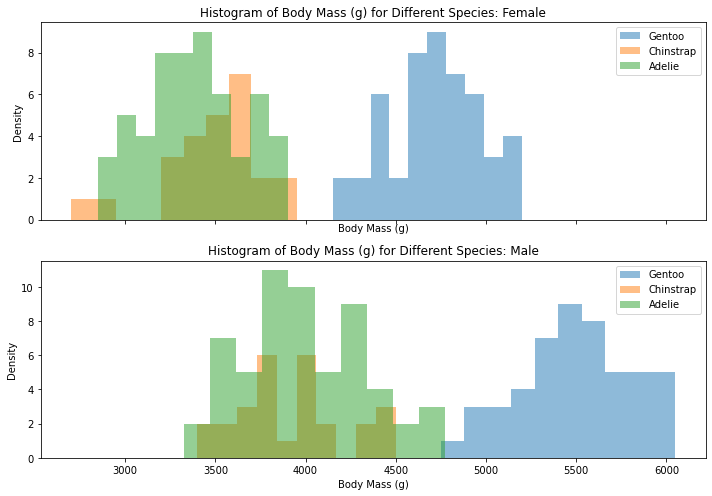

In [ ]:
def plt_hist(penguins_train):
  '''
  input:
     penguins_train: a training data set subsetted from penguins
  output:
     a histogram of body mass for all species for both sex
  '''
  fig,  ax = plt.subplots(2,figsize = (10,7), sharex = True)
  #iterate thru all sex
  for gender in range(2):
    genderList = ["Female","Male"]
    penguins_train_gender = penguins_train[penguins_train["Sex"]==gender]
    species = set(penguins_train["Species"])
    #iterate thru all species
    for i in species:
      subspecies = penguins_train_gender[penguins_train_gender["Species"]==i]
      label = i.split(" ")[0]
      ax[gender].hist(subspecies["Body Mass (g)"],label = label,alpha = 0.5)
      ax[gender].set(xlabel = "Body Mass (g)", ylabel = "Density", title = "Histogram of Body Mass (g) for Different Species: " + genderList[gender])
    ax[gender].legend()
    plt.tight_layout()

plt_hist(penguins_train)


**A Scatter Plot of Culmen Depth and Culmen Length for All Species**

This scatterplot shows culmen length plotted against culmen depth for all species, split by gender. These plots illustrated that male penguins of all species tend to have longer culmen lengths and depths on average. There is also nearly no overlap in culmen lengths and depths between the three species. Therefore, this shows that culmen length vs. culmen depth is a good predictor of penguin species, since the three species each occupy a distinct cluster in the scatter plot. This led us to consider using culmen length and culmen depth as our two quantitative features.

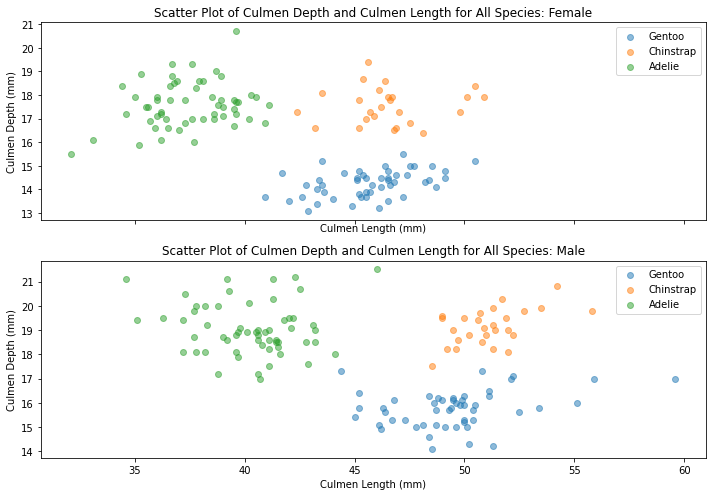

In [ ]:
def plt_scatter(penguins_train):
  '''
  input:
     penguins_train: a training data set subsetted from penguins
  output:
     a scatter plot of body culmen length and culmen depth for all species for both sex
  '''   
  fig,  ax = plt.subplots(2,figsize = (10,7), sharex = True)
  # iterate thru all sex
  for gender in range(2):
    genderList = ["Female","Male"]
    penguins_train_gender = penguins_train[penguins_train["Sex"]==gender]
    species = set(penguins_train["Species"])
    #iterate thru all species
    for i in species:
      subspecies = penguins_train_gender[penguins_train_gender["Species"]==i]
      label = i.split(" ")[0]
      ax[gender].scatter(subspecies["Culmen Length (mm)"], subspecies["Culmen Depth (mm)"], label = label,alpha = 0.5)
      ax[gender].set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)", title = "Scatter Plot of Culmen Depth and Culmen Length for All Species: " + genderList[gender])
    ax[gender].legend()
    plt.tight_layout()

plt_scatter(penguins_train)


**A Bar Plot of Species and Average Culmen Length**

The bar plot of average culmen length among the three species shows that the flipper lengths of Gentoo and Chinstrap penguins are quite similar, but the flipper length of the Adelie penguin is significantly longer. This figure illustrates that flipper length may not be the best quantitative feature to predict species, since Gentoo and Chinstrap penguins have such similar flipper lengths, on average.

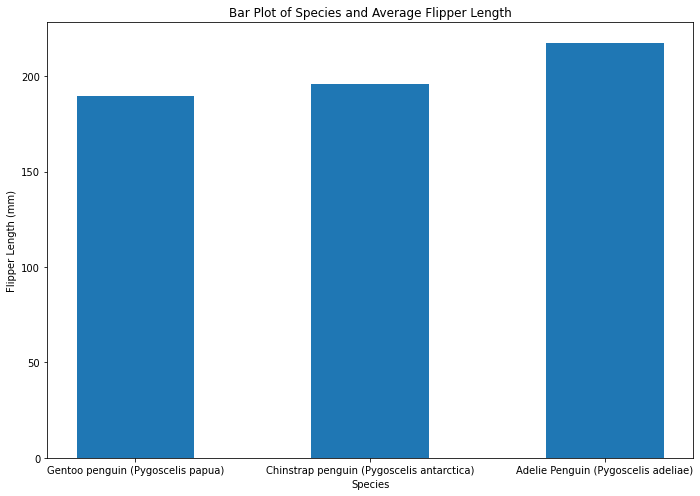

In [ ]:
fig,  ax = plt.subplots(1,figsize = (10,7))
ax.set(xlabel = "Species", ylabel = "Flipper Length (mm)")
#name of all species
setOfIsland = list(set(penguins_train["Species"]))
#means of flipper length of each species
setOfDepth = list (penguins_train.groupby(["Species"])["Flipper Length (mm)"].mean())

plt.bar(setOfIsland, setOfDepth, width = 0.5)
 
plt.title("Bar Plot of Species and Average Flipper Length")
plt.tight_layout()
plt.show()

From the exploratory analysis, we conclude that the qualitative feature we most likely want to use in our models is "Island". We found that two of the species each only reside on one specific island, so this would be a valuable characteristic to use while further exploring our models. We also concluded that culmen length and culmen depth were the two most promising quantitative features to predict penguin species. Now, let's move on to feature selection to further explore which one qualitative and two quantitative features we should use in our models!

**Feature Selection**


Before testing two quantitative features to select for the models, we first have to clean the training and testing data again. In the prep_penguins_data function, we make a copy of the penguins_train data frame and drop the "Species" column for the X (predictor) variable, and make the y (target) variable equal to the "Species" column. We then set X_train and y_train equal to these variables.

Note: it is important to remember what X and y stand for throughout the project! X is the predictor variable, and y is the target variable!

In [ ]:
# Clean training and testing data

from sklearn import preprocessing
def prep_penguins_data(data_df):
    '''
    input: 
      data_df： a data frame format  input, which will be penguins_train data set
    output:
      X: everything without species, namingly "Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Sex"
      y: species variable
    '''
    df = data_df.copy().dropna() 
    # need to drop "Species" from penguins_train
    X = df.drop(['Species'], axis = 1)
    y = df['Species']
        
    return(X, y)

X_train, y_train = prep_penguins_data(penguins_train)

Continuing on with feature selection, we are now making a list of combinations of the multiple quantitative and qualitative features we are considering using in our models. These include the following: Island, Culmen Length, Culmen Depth, Body Mass, and Sex. Our exhaustive search algorithm iterated through all possible combinations of the given features to determine which columns produced the best cross validation score. 

In [ ]:
from itertools import combinations

combos = ["Island", "Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Sex"]

# all pairs
list(combinations(combos,2))

# all triples

list(combinations(combos,3))

# Exhaustive search algorithm:
# Should iterate through all subsets and identify best subset of columns
# in terms of cross validation error.
def exhaustive_search(model, X, y, min_cols, max_cols):
    '''
    input:
      model: desired model for ML
      X: everything without species, namingly "Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Sex"
      y: species variable
      min_cols: min number of elements from X
      max_col: max number of elements from X
    output:
      best_cv: highest cv value for best_cols
      best_cols: best combo of elements that are most relevant to species
    '''
    best_cv = 0
    best_cols = None
    for n_cols in range(min_cols, max_cols + 1):
        for cols in combinations(X.columns, n_cols):
            cv = cross_val_score(model, X[list(cols)], y, cv = 10).mean()
            if cv > best_cv:
                best_cv = cv
                best_cols = cols    
    return best_cv, best_cols


We are now applying our exhaustive search function to our Logistic Regression model. Let's see which features are most predictive of penguin species!

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


from sklearn.pipeline import make_pipeline #to help scale data
from sklearn.preprocessing import StandardScaler #scaler we will use to scale our data

LR = LogisticRegression(max_iter=10000)

my_model = make_pipeline(StandardScaler(), LR)
#set number of varibles to be 2-4
best_cv, best_cols = exhaustive_search(LR, X_train, y_train, 2, 4)
best_cv, best_cols

# The most predictive qualitative feature is Island, and the 2 most predictive quantitative features are Culmen Length and Culmen Depth
# (0.9925925925925926,
# ('Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)'))


(0.9925925925925926,
 ('Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)'))

After applying this exhuastive search function to our Logistic Regression model with a max_columns = 2, the best columns were Island and Culmen Length. After changing to max_columns = 4, we found that the most predictive features were Island, Culmen Length, Culmen Depth, and Body Mass. This output also resulted in a best cross validation score (using these columns) of 0.9925925925925926, which was very good! 

Therefore, through automated feature selection and the exhaustive search algorithm, we determined that the features we wanted to use in our model were: 

One Qualitative: Island

Two Quantitative: Culmen Length, Culmen Depth


**Modeling**

We are finally approaching our modeling section! It's time to visualize and evaluate the performance of multiple machine learning models on predicting species of penguins!

But before we can proceed, we must clean the training and testing data one final time. We will narrow down the columns of the previous penguins_train and penguins_test data frames to only include the 2 quantitative features and 1 qualitative feature we are interested in, as well as the target variable y, which is Species.

In [ ]:
# Clean final training and testing data

# Keep the "Culmen Length (mm)", "Culmen Depth (mm)", "Island", "Species" columns
penguins_train_final = penguins_train[["Culmen Length (mm)", "Culmen Depth (mm)", "Island", "Species"]]
penguins_test_final = penguins_test[["Culmen Length (mm)", "Culmen Depth (mm)", "Island", "Species"]]



In the cell below, we are determining which number we encoded for each species. Earlier in the project, we recoded the Species column of the data frame with (0,1,2) and now we see that the Adelie Penguin was recoded as 0, Chinstrap Penguin as 1, and Gentoo Penguin as 2. These numbers are useful in the later portion of the project when we plot decision regions, so let's keep them in mind!

In [ ]:
# Remember which number corresponds which species (for later use in the decision regions)
dfcopy = penguins_train_final.copy().dropna()
dfcopy['SpeciesNumber'] = le.fit_transform(dfcopy['Species'])

speciesDf = dfcopy.groupby("Species")["Species", "SpeciesNumber"].max()
speciesDf = speciesDf.values
speciesDf

#Adelie penguin = 0
#Chinstrap penguin = 1 
#Gentoo penguin = 2

<ipython-input-17-fb10f5efac41>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  speciesDf = dfcopy.groupby("Species")["Species", "SpeciesNumber"].max()


array([['Adelie Penguin (Pygoscelis adeliae)', 0],
       ['Chinstrap penguin (Pygoscelis antarctica)', 1],
       ['Gentoo penguin (Pygoscelis papua)', 2]], dtype=object)

Here, we are cleaning our final training and testing set. The X_train, y_train, X_test, and y_test outputted in the cell below are the data frames we will use in the modeling section. 


In [ ]:
# Clean final training and testing set

def prep_penguinsfinal_data(data_df):
    '''
    input: 
      data_df： a data frame format  input, which will be penguins_train data set
    output:
      X: data without species, namingly "Culmen Length (mm)", "Culmen Depth (mm)", "Island", "Species"
      y: species variable
    '''
    df = data_df.copy().dropna()
    le = preprocessing.LabelEncoder()
    df['Species'] = le.fit_transform(df['Species'])
    
    X_final = df.drop(['Species'], axis = 1)
    y_final = df['Species']

    return(X_final, y_final)


X_train, y_train = prep_penguinsfinal_data(penguins_train_final)
X_test,  y_test  = prep_penguinsfinal_data(penguins_test_final)



Now, we have finally arrived at our modeling section! In this section, we will evaluate the performance of three machine learning models on predicting species of penguins based on island, culmen length, and culmen depth.

**Model 1: Logistic Regression**

The first machine learning model we are using is Logistic Regression! We will first fit the model with the X_train and y_train data frames, which is "training" the model. Then, we will proceed to "test" the model by creating a new variable called y_test_pred which will be the predictions the Logistic Regression model comes up with using the X_test predictor data frame.

Remember: X is the predictor variable, and y is the target variable!

We will perform cross validation for Logistic Regression by choosing the best "c" hyperparameter to use in our model.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

best_score = 0
#exploring different "C"s with the best best_score
for d in range(1,30):
    LR = LogisticRegression(C = d, max_iter=100000)
    cv_score = cross_val_score(LR, X_train, y_train, cv=10).mean()
    if cv_score > best_score:
        best_c = d
        best_score = cv_score

LR = LogisticRegression(C = best_c)
# training
LR.fit(X_train, y_train)
# evaluating
y_test_pred = LR.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Best Hyperparameter: " + str(best_c))

Best Hyperparameter: 23


Our cross validation showed us that our best hyperparameter "C" was 23, so we will use this value in our Logistic Regression model!

A **decision region** is a visual representation of the accuracy with which a model predicts values. The bounded, shaded regions are what the model predicts to be the culmen length and depth values of a certain species of penguin. Then, we assess the accuracy of the model by looking at how many data points stray from those boundaries. If all data points for each species fall within their associated boundaries, then our model did a really good job!

Below we have the plot_regions function that we will employ across all three machine learning models. This function plots the decision region for a given model with predictor data frame X and target data frame y. In our models, we will be using X_test and y_test. 


In [ ]:
# decision region function

def plot_regions(c, X, y):
    '''
    input:
      c: the model we are passing in
      X: data without species, namingly "Culmen Length (mm)", "Culmen Depth (mm)", "Island", "Species"
      y: species variable 
    output:
      graph given inputs
    '''
    # for convenience, give names to the two 
    # columns of the data
    x0 = X['Culmen Length (mm)']
    x1 = X['Culmen Depth (mm)']

    # create a grid
    grid_x = np.linspace(x0.min()-1,x0.max()+1,1001)
    grid_y = np.linspace(x1.min()-1,x1.max()+1,1001)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    # extract model predictions, using the 
    # np.c_ attribute to join together the 
    # two parts of the grid. 
    # array.ravel() converts an multidimensional
    # array into a 1d array, and we use array.reshape()
    # to turn the resulting predictions p 
    # back into 2d
    
    XX = xx.ravel()
    YY = yy.ravel()
    size = len(XX)

    X = X.values

    # create plot
    fig, ax = plt.subplots(3,figsize=(7,10), dpi=100)

    color = {0: "blue", 1: "green", 2: "red"}
    color_species = {0:"Adelie", 1:"Chinstrap", 2:"Gentoo"}
    
    # first for loop iteration, concatenate a bunch of 0s - plot this for Island 0: Biscoe 
    # next for loop iteration, concatenate a bunch of 1s  - plot this for Island 1: Dream
    # final for loop iteration, concatenate a bunch of 2s - plot this for Island 2: Torgersen
    for island in range(3):
      islandList = ["Biscoe", "Dream", "Torgersen"]
      ZZ = island * (np.ones(size))
      XY = np.c_[XX, YY, ZZ]
      p = c.predict(XY)
      p = p.reshape(xx.shape)

      ax[island].contourf(xx, yy, p, alpha = 0.2, cmap = "jet")

      Xg = X[X[:,2]==island] #X dataframe for specific island
      yg = y[X[:,2]==island] #y dataframe for specific island
      print(Xg)
      print(yg)
      # graph each species at a time
      for species in [0,1,2]:
                           #culmen length        #culmen depth         
        ax[island].scatter(Xg[yg==species][:,0], Xg[yg==species][:,1], c = color[species], label = color_species[species])

      ax[island].set(xlabel = "Culmen Length (mm)", 
            ylabel = "Culmen Depth (mm)", 
            title = islandList[island], 
            label = y)
      
      ax[island].legend()

    plt.tight_layout()

A **confusion matrix** is another representation of a model's accuracy. The diagonal values of a confusion matrix are the correct predictions; in other words, this is where the model did well. The elements of the diagonal are misfires: where the model went wrong. To interpret a confusion matrix alongside a decision region, one should ensure that the number of misfires calculated by the confusion matrix is consistent with the number of points outside the boundaries for a given species in the decision region (total for all island plots).


0.9705882352941176
[[30  2  0]
 [ 0 16  0]
 [ 0  0 20]]


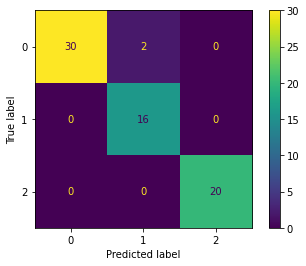

In [ ]:
# confusion matrix for test set
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
#get the accuracy score
accuracy_score = accuracy_score(y_test, y_test_pred)
print(accuracy_score)
#confusion matrix for LR model
LR_test = confusion_matrix(y_test, y_test_pred, labels = LR.classes_)
LR_disp = ConfusionMatrixDisplay(confusion_matrix = LR_test, display_labels=LR.classes_)
print(LR_test)
#draw the confusion matrix
LR_disp.plot()
plt.show()
# diagonal values are correct predictions - where model did well
# off diagonal elements are where model went wrong

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[36.4 17.1  0. ]
 [49.2 15.2  0. ]
 [42.7 18.3  0. ]
 [45.1 14.5  0. ]
 [48.2 15.6  0. ]
 [35.9 19.2  0. ]
 [35.  17.9  0. ]
 [42.7 13.7  0. ]
 [49.8 16.8  0. ]
 [45.6 20.3  0. ]
 [34.5 18.1  0. ]
 [51.5 16.3  0. ]
 [37.9 18.6  0. ]
 [45.5 15.   0. ]
 [41.1 19.1  0. ]
 [43.8 13.9  0. ]
 [54.3 15.7  0. ]
 [47.5 14.   0. ]
 [41.  20.   0. ]
 [35.5 16.2  0. ]
 [50.5 15.9  0. ]
 [38.1 16.5  0. ]
 [45.8 14.6  0. ]
 [43.2 14.5  0. ]
 [50.7 15.   0. ]
 [50.8 15.7  0. ]
 [37.6 19.1  0. ]
 [45.3 13.8  0. ]
 [46.8 15.4  0. ]
 [47.6 14.5  0. ]
 [47.5 14.2  0. ]
 [44.9 13.8  0. ]]
64     0
237    2
115    0
252    2
292    2
22     0
100    0
260    2
285    2
111    0
54     0
333    2
104    0
277    2
67     0
276    2
283    2
308    2
101    0
66     0
264    2
110    0
234    2
278    2
289    2
315    2
59     0
280    2
229    2
224    2
296    2
304    2
Name: Species, dtype: int64
[[40.3 18.5  1. ]
 [42.2 18.5  1. ]
 [47.6 18.3  1. ]
 [35.7 18.   1. ]
 [40.8 18.9  1. ]
 [58.  17.8  1. ]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[39.2 19.6  2. ]
 [35.7 17.   2. ]
 [45.8 18.9  2. ]
 [38.6 21.2  2. ]
 [33.5 19.   2. ]
 [39.1 18.7  2. ]
 [39.7 18.4  2. ]]
7      0
118    0
73     0
13     0
70     0
0      0
71     0
Name: Species, dtype: int64


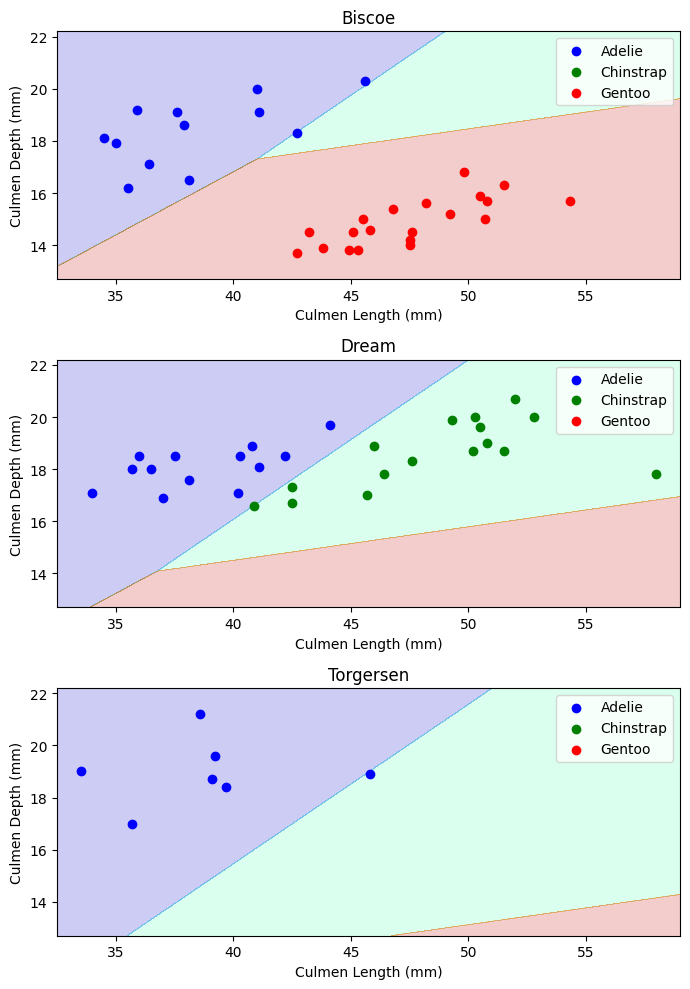

In [ ]:
# decision region for testing set, males (bottom) + females (top)
plot_regions(LR, X_test, y_test)


**Discussion of Logistic Regression Model:**

According to the confusion matrix, the logistic regression model should have two misfires in total. This was shown to be consistent with the decision region plots, with one of the misfires being an Adelie penguin misclassified as a Chinstrap penguin in the "Biscoe" decision region, and the other being an Adelie penguin misclassified as a Chinstrap penguin in the "Torgersen" decision region. For the misfire in the Biscoe plot, this was due to the fact that the Adelie penguin had a culmen length and depth that placed it just on the boundary between the Adelie and Chinstrap region. In the Torgersen plot, the misfire was because an Adelie penguin had an especially long culmen length compared to other Adelies.


**Model 2: Random Forest Classifier**



First, we will use cross validation to choose complexity parameters. Then, we will select the best depth to use as a parameter for the Random Forest Classifier model.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

best_score = 0
#exploring different max_depth with the best best_score
for d in range(1,30):
    RF = RandomForestClassifier(max_depth = d)
    cv_score = cross_val_score(RF, X_train, y_train, cv=10).mean()
    if cv_score > best_score:
        best_depth = d
        best_score = cv_score
#creating the RF model with best depth
print("Best Hyperparameter: " + str(best_depth))
RF = RandomForestClassifier(best_depth)
RF.fit(X_train, y_train)
y_test_pred = RF.predict(X_test)

Best Hyperparameter: 8


0.9411764705882353
[[30  1  1]
 [ 2 14  0]
 [ 0  0 20]]


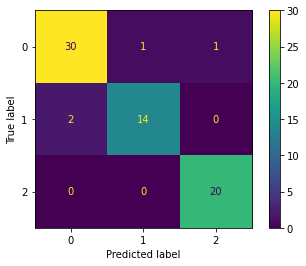

In [ ]:
# confusion matrix for test set
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay

#get the accuracy score
RF_accuracy = accuracy_score(y_test,y_test_pred)
print(RF_accuracy)
#confusion matrix for RF model
RF_test = confusion_matrix(y_test, y_test_pred, labels = RF.classes_)
RF_disp = ConfusionMatrixDisplay(confusion_matrix = RF_test, display_labels=RF.classes_)
print(RF_test)
#draw the confusion matrix
RF_disp.plot()
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[[36.4 17.1  0. ]
 [49.2 15.2  0. ]
 [42.7 18.3  0. ]
 [45.1 14.5  0. ]
 [48.2 15.6  0. ]
 [35.9 19.2  0. ]
 [35.  17.9  0. ]
 [42.7 13.7  0. ]
 [49.8 16.8  0. ]
 [45.6 20.3  0. ]
 [34.5 18.1  0. ]
 [51.5 16.3  0. ]
 [37.9 18.6  0. ]
 [45.5 15.   0. ]
 [41.1 19.1  0. ]
 [43.8 13.9  0. ]
 [54.3 15.7  0. ]
 [47.5 14.   0. ]
 [41.  20.   0. ]
 [35.5 16.2  0. ]
 [50.5 15.9  0. ]
 [38.1 16.5  0. ]
 [45.8 14.6  0. ]
 [43.2 14.5  0. ]
 [50.7 15.   0. ]
 [50.8 15.7  0. ]
 [37.6 19.1  0. ]
 [45.3 13.8  0. ]
 [46.8 15.4  0. ]
 [47.6 14.5  0. ]
 [47.5 14.2  0. ]
 [44.9 13.8  0. ]]
64     0
237    2
115    0
252    2
292    2
22     0
100    0
260    2
285    2
111    0
54     0
333    2
104    0
277    2
67     0
276    2
283    2
308    2
101    0
66     0
264    2
110    0
234    2
278    2
289    2
315    2
59     0
280    2
229    2
224    2
296    2
304    2
Name: Species, dtype: int64


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[[40.3 18.5  1. ]
 [42.2 18.5  1. ]
 [47.6 18.3  1. ]
 [35.7 18.   1. ]
 [40.8 18.9  1. ]
 [58.  17.8  1. ]
 [50.3 20.   1. ]
 [45.7 17.   1. ]
 [40.9 16.6  1. ]
 [46.  18.9  1. ]
 [42.5 17.3  1. ]
 [44.1 19.7  1. ]
 [46.4 17.8  1. ]
 [51.5 18.7  1. ]
 [38.1 17.6  1. ]
 [37.  16.9  1. ]
 [40.2 17.1  1. ]
 [37.5 18.5  1. ]
 [42.5 16.7  1. ]
 [50.2 18.7  1. ]
 [41.1 18.1  1. ]
 [52.8 20.   1. ]
 [49.3 19.9  1. ]
 [34.  17.1  1. ]
 [36.  18.5  1. ]
 [52.  20.7  1. ]
 [50.8 19.   1. ]
 [50.5 19.6  1. ]
 [36.5 18.   1. ]]
97     0
37     0
188    1
90     0
95     0
169    1
168    1
214    1
182    1
160    1
206    1
43     0
180    1
200    1
134    0
44     0
140    0
133    0
184    1
219    1
91     0
181    1
209    1
92     0
42     0
189    1
218    1
167    1
40     0
Name: Species, dtype: int64


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[[39.2 19.6  2. ]
 [35.7 17.   2. ]
 [45.8 18.9  2. ]
 [38.6 21.2  2. ]
 [33.5 19.   2. ]
 [39.1 18.7  2. ]
 [39.7 18.4  2. ]]
7      0
118    0
73     0
13     0
70     0
0      0
71     0
Name: Species, dtype: int64


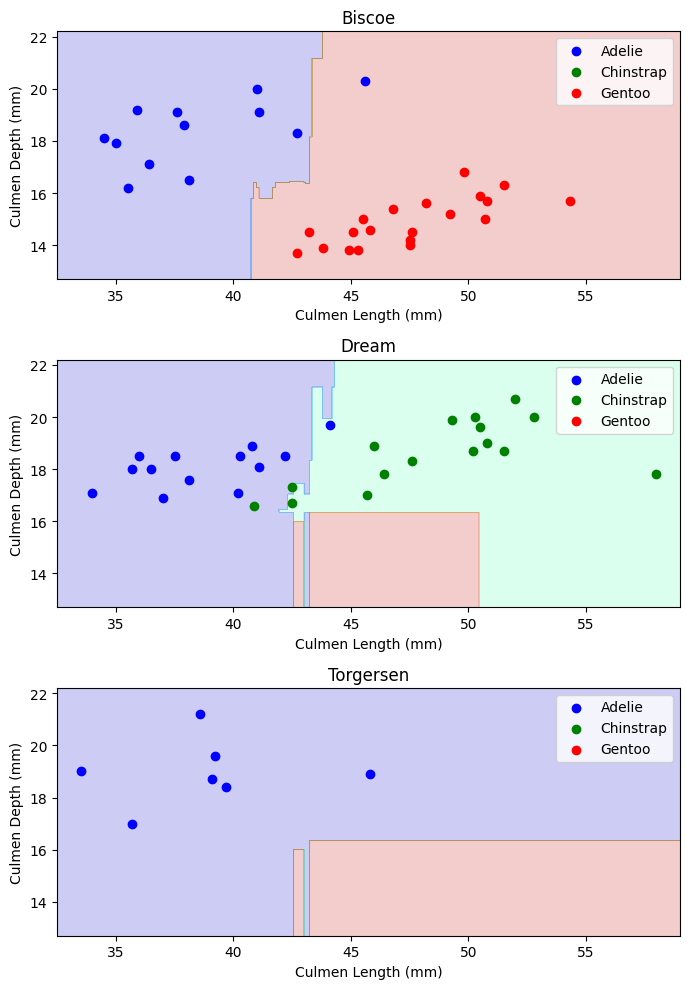

In [ ]:
# decision region for test set, males (top) + females (bottom)
plot_regions(RF, X_test, y_test)

**Discussion of Random Forest Classifier Model:**

According to the confusion matrix, the Random Forest model should have four misfires in total. This was shown to be consistent with the decision region plots, with one misfire being a Adelie penguin misclassified as a Gentoo penguin in the "Biscoe" decision region. This was because the Adelie penguin had an especially long culmen length compared to other Adelie penguins. There were also three misfires in the "Dream" region, with two misfires being a Chinstrap misidentified as an Adelie, and another misfire being an Adelie misidentified as a Chinstrap. This was because one of the Chinstraps had an especially short culmen length compared to the other Chinstraps, and the second Chinstrap had a combination of a shorter culmen length and longer culmen depth that just put it at the edge of the decision boundary. The Adelie had a longer culmen length and depth compared to the rest of the Adelies, which placed it in the "Chinstrap" region.

**Model 3: Support Vector Machine**





In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy

best_score = 0
#exploring different "C"s with the best best_score
for d in range(1,30):
    SVM = svm.SVC(C = d)
    cv_score = cross_val_score(SVM, X_train, y_train, cv=10).mean()
    if cv_score > best_score:
        best_c = d
        best_score = cv_score

#creating the SVM model with the best kernel
print("Best Hyperparameter: " + str(best_c))
SVM = svm.SVC(C = best_c)
SVM.fit(X_train, y_train)
y_train_pred = SVM.predict(X_train)
y_test_pred = SVM.predict(X_test)

Best Hyperparameter: 24


0.9117647058823529
[[30  2  0]
 [ 3 12  1]
 [ 0  0 20]]


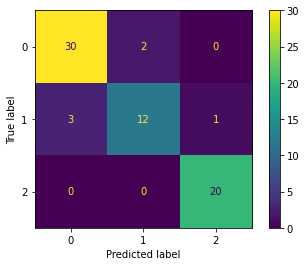

In [ ]:
# confusion matrix for test set
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay

#get the accuracy score
SVM_accuracy = accuracy_score(y_test,y_test_pred)
print(SVM_accuracy)
#confusion matrix for SVM model
SVM_test = confusion_matrix(y_test, y_test_pred, labels = SVM.classes_)
SVM_disp = ConfusionMatrixDisplay(confusion_matrix = SVM_test, display_labels=SVM.classes_)
print(SVM_test)
#draw the confusion matrix
SVM_disp.plot()
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[[36.4 17.1  0. ]
 [49.2 15.2  0. ]
 [42.7 18.3  0. ]
 [45.1 14.5  0. ]
 [48.2 15.6  0. ]
 [35.9 19.2  0. ]
 [35.  17.9  0. ]
 [42.7 13.7  0. ]
 [49.8 16.8  0. ]
 [45.6 20.3  0. ]
 [34.5 18.1  0. ]
 [51.5 16.3  0. ]
 [37.9 18.6  0. ]
 [45.5 15.   0. ]
 [41.1 19.1  0. ]
 [43.8 13.9  0. ]
 [54.3 15.7  0. ]
 [47.5 14.   0. ]
 [41.  20.   0. ]
 [35.5 16.2  0. ]
 [50.5 15.9  0. ]
 [38.1 16.5  0. ]
 [45.8 14.6  0. ]
 [43.2 14.5  0. ]
 [50.7 15.   0. ]
 [50.8 15.7  0. ]
 [37.6 19.1  0. ]
 [45.3 13.8  0. ]
 [46.8 15.4  0. ]
 [47.6 14.5  0. ]
 [47.5 14.2  0. ]
 [44.9 13.8  0. ]]
64     0
237    2
115    0
252    2
292    2
22     0
100    0
260    2
285    2
111    0
54     0
333    2
104    0
277    2
67     0
276    2
283    2
308    2
101    0
66     0
264    2
110    0
234    2
278    2
289    2
315    2
59     0
280    2
229    2
224    2
296    2
304    2
Name: Species, dtype: int64


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[[40.3 18.5  1. ]
 [42.2 18.5  1. ]
 [47.6 18.3  1. ]
 [35.7 18.   1. ]
 [40.8 18.9  1. ]
 [58.  17.8  1. ]
 [50.3 20.   1. ]
 [45.7 17.   1. ]
 [40.9 16.6  1. ]
 [46.  18.9  1. ]
 [42.5 17.3  1. ]
 [44.1 19.7  1. ]
 [46.4 17.8  1. ]
 [51.5 18.7  1. ]
 [38.1 17.6  1. ]
 [37.  16.9  1. ]
 [40.2 17.1  1. ]
 [37.5 18.5  1. ]
 [42.5 16.7  1. ]
 [50.2 18.7  1. ]
 [41.1 18.1  1. ]
 [52.8 20.   1. ]
 [49.3 19.9  1. ]
 [34.  17.1  1. ]
 [36.  18.5  1. ]
 [52.  20.7  1. ]
 [50.8 19.   1. ]
 [50.5 19.6  1. ]
 [36.5 18.   1. ]]
97     0
37     0
188    1
90     0
95     0
169    1
168    1
214    1
182    1
160    1
206    1
43     0
180    1
200    1
134    0
44     0
140    0
133    0
184    1
219    1
91     0
181    1
209    1
92     0
42     0
189    1
218    1
167    1
40     0
Name: Species, dtype: int64


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[[39.2 19.6  2. ]
 [35.7 17.   2. ]
 [45.8 18.9  2. ]
 [38.6 21.2  2. ]
 [33.5 19.   2. ]
 [39.1 18.7  2. ]
 [39.7 18.4  2. ]]
7      0
118    0
73     0
13     0
70     0
0      0
71     0
Name: Species, dtype: int64


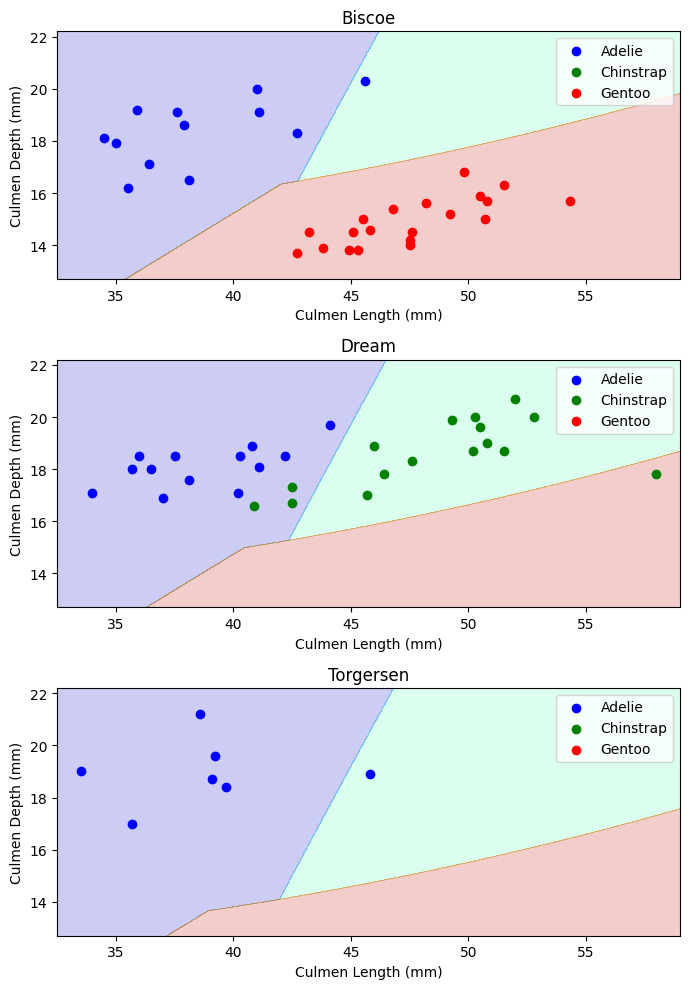

In [ ]:
# decision region 
plot_regions(SVM, X_test, y_test)

**Discussion of Support Vector Machine Model:**

According to the confusion matrix, the SVM model should have six misfires in total. This was shown to be consistent with the decision region plots. There was one misfire in the "Biscoe" region, with an Adelie penguin misclassified as a Chinstrap. This was because the Adelie penguin had a longer culmen length and depth compared to the other Adelie penguins. Additionally, there were four misfires in the "Dream" region, with three Chinstraps misclassified as Adelie penguins, and one Chinstrap misclassified as a Gentoo penguin. The three Chinstraps had shorter culmen depths and culmen lengths than most of the other Chinstraps, while the fourth Chinstrap had a much longer culmen length. Finally, there was one misfire in the "Torgersen" region, with an Adelie penguin misclassified as a Chinstrap because it had an especially long culmen length. 

**Discussion**

- Describe the overall performance of your models

After employing all three machine learning models, we found that the most accurate predictor of penguin species was the Logistic Regression model along with the features Culmen Length, Culmen Depth, and Island. This was because the Logistic Regression Model had 2 misfires, while the Random Forest model had 4 misfires, and the SVM model had 6 misfires. Additionally, the LR model had an accuracy score of 0.9705882352941176, the RF model had an accuracy score of 0.9411764705882353, and the SVM model had an accuracy score of 0.9117647058823529. 

SVM appeared to be the least accurate model because its boundary for classifying Chinstrap penguins was very inaccurate for the Dream island, with four being misclassified. For both the Logistic Regression and SVM models, we chose to choose the best "C" value as our hyperparameter, and we found that the best "C" value for LR was 23, and the best "C" for SVM was 24. We used depth as our hyperparameter for the Random Forest model, and the max_depth with the best cross validation score was 8. 


Random Forest was a more accurate and flexible model than SVM. The boundaries had some jagged edges, which allowed for finer differentiation, but followed the nuances of the specific data little too closely, resulting in four misfires. The Logistic Regression was slightly more accurate than Random forest, with two misfires, and was also more flexible than SVM. 

However, in terms of the presentation of the decision regions, Random Forest appeared to have the most accurate boundaries compared to the Logistic Regression and SVM models. For the Biscoe plot, the Random Forest model didn't have a green region to represent Chinstrap penguins since they don't reside on the Biscoe island. Additionally, the Dream plot only had a very small red region for the Gentoo species since the Dream island only contains Adelie and Chinstrap penguins. The Torgersen plot had a relatively smaller red region for the Gentoo penguin as well and no green region for Chinstraps, since the Adelie species is the only one that resides on the Torgersen island. On the other hand, both the Logistic Regression and SVM models included all three colored regions for each island, even when not every island included every penguin species. Both Dream and Biscoe plots should only have two colored regions each (because only two penguins species exist on each island - Adelie and Gentoo on Biscoe and Adelie and Chinstrap on Dream), Torgersen plots with one colored region (only Adelie penguins exist on that island). This data illustrates that the Random Forest model was more accurate in terms of the shaded regions that represent the species that reside on each island.


- State which combination of model and features (measurements) you recommend

Through our exploratory analysis and automated feature selection, we chose Culmen Length, Culmen Depth, and Island as the features we wanted to use in our models. However, if we were to repeat this project and improve on our decisions, we may have wanted to use Sex as a qualitative feature instead of Island, or, include it as additional feature. We previously created thee models using Sex as a qualitative feature, and we actually had higher accuracy scores for almost all our models. However, we made a slight change to our data, and our automated feature selection began to output Island as the best predictor variable to use. So, in this project, we made the rational decision to use Island as our qualitative feature instead because it showed the best cross validation score according to our automated feature selection. 
 

- Discuss how the model could be improved if more or different data were available

We could improve the model by using more data. Instead of just choosing one qualitative variable, we could have used both Sex and Island. Additionally, we could have used Body Mass as a third quantitative variable, because it was identified by our automated feature selection as a good choice as well.